In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

import zmq
import numpy as np
from matplotlib import pyplot
import cv2

    
from PIL import Image
import io

In [2]:
model = load_model('generator_100.h5')

context = zmq.Context()
socket = context.socket(zmq.REP)
socket.bind("tcp://*:5555")

<SocketContext(bind='tcp://*:5555')>

In [3]:
# load an image
def load_image(pixels):
    # load image with the preferred size
    #pixels = load_img(filename, target_size=size)
    # convert to numpy array
    pixels = img_to_array(pixels)
    # scale from [0,255] to [-1,1]
    pixels = (pixels - 127.5) / 127.5
    # reshape to 1 sample
    pixels = np.expand_dims(pixels, 0)
    return pixels

1
w bytes received
przed predykcja
ppo predycji


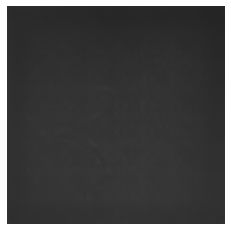

2
w bytes received
przed predykcja
ppo predycji


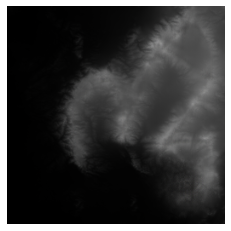

3


In [ ]:
iteracja = 0

while True:
    iteracja+=1
    print(iteracja)
    bytes_received = socket.recv()
    print('w bytes received')

    image = Image.open(io.BytesIO(bytes_received))
    image.show()
    
    image = load_image(image)
    
    print('przed predykcja')
    gen_image = model.predict(image)
    print('ppo predycji')
    # scale from [-1,1] to [0,1]
    gen_image = (gen_image + 1) / 2.0
    # plot the image

    pyplot.imshow(gen_image[0])

    pyplot.axis('off')
    pyplot.show()
    
    #array_received = np.frombuffer(bytes_received, dtype=np.float32).reshape(28,28)
    #print('w array received')
    #pyplot.imshow(array_received)

    #pyplot.axis('off')
    #pyplot.show()
    #pred = model.predict(array_received.reshape(1,784))
    #print('w pred')
    #bytes_to_send = pred.tobytes()
    #print('bytes to send')
    #socket.send(bytes_to_send)
    socket.send(bytes_received)